In [104]:
import torch
from torch import nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as py
import torchvision.models as models

In [5]:
def data_pipe(batch_size,data_dir='data'):
    transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
    train_data = datasets.FashionMNIST(data_dir,download=True,train=True,transform=transform)
    test_data = datasets.FashionMNIST(data_dir,download=True,train=False,transform=transform)
    train = DataLoader(train_data,shuffle=True,batch_size=batch_size)
    test = DataLoader(test_data,shuffle=True,batch_size=batch_size)
    return train,test

In [6]:
def get_class_names():
    return [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot",
    ]

def get_class_index(name):
    return get_class_names().index(name)

def get_class_name(index):
    return get_class_names()[index]

In [7]:
train,test = data_pipe(64)

In [26]:
first = next(iter(train))


In [27]:
im, label = first

In [28]:
label

tensor([3, 3, 7, 1, 6, 2, 8, 4, 1, 4, 8, 7, 6, 8, 5, 6, 0, 0, 3, 5, 2, 4, 5, 2,
        3, 0, 8, 5, 8, 4, 2, 0, 0, 1, 5, 8, 0, 5, 4, 3, 2, 0, 1, 3, 0, 6, 4, 4,
        3, 2, 8, 3, 4, 7, 9, 0, 4, 5, 0, 8, 0, 3, 0, 6])

In [10]:
first_test = next(iter(test))

In [65]:
first_test[0][0].size()

torch.Size([1, 28, 28])

In [52]:
check = np.array(first[0][0])

In [53]:
check = check*0.5 + 0.5

In [54]:
check = check[0]

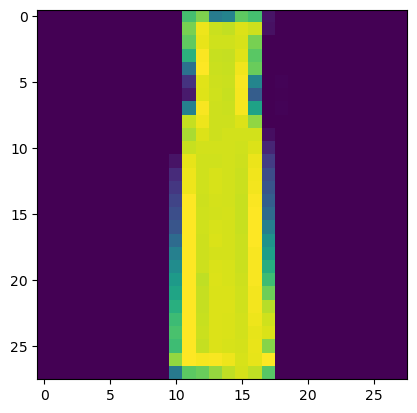

In [55]:
py.imshow(first[0][1].squeeze())

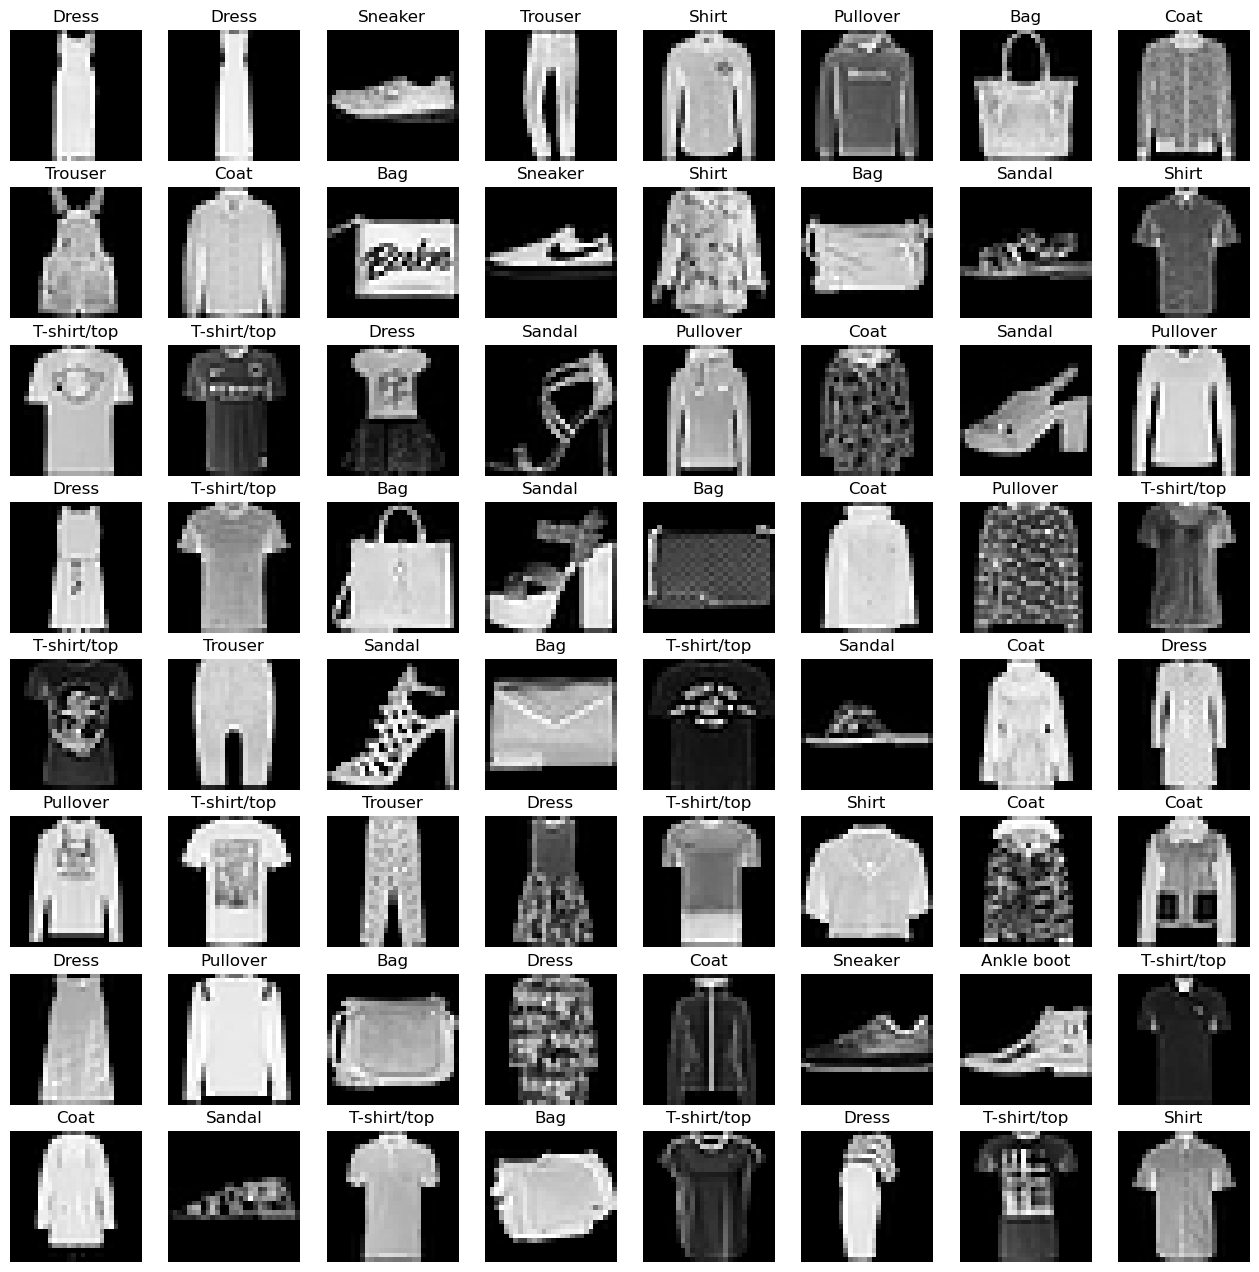

In [97]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(8, 8, figsize=(16, 16))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(((np.array(im[i]) * 0.5 + 0.5).squeeze()), cmap='gray')  # Assuming grayscale image
    ax.axis('off')  # Turn off axis
    ax.set_title(get_class_name(label[i]))

plt.show()


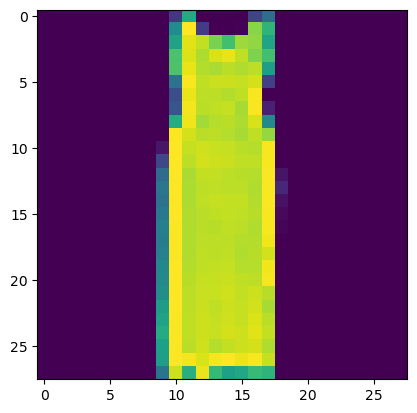

In [98]:
plt.imshow((np.array(im[0])*0.5 + 0.5).squeeze())

In [99]:
im.size()

torch.Size([64, 1, 28, 28])

In [102]:
m_net = models.mobilenet_v3_small(pretrained=True)

/home/gagandeep/miniconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/gagandeep/miniconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /home/gagandeep/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████████████████████████████████| 9.83M/9.83M [00:00<00:00, 26.4MB/s]


In [109]:
class m_net_out(nn.Module):
    def __init__(self):
        super(m_net_out,self).__init__()
        self.model = m_net
        self.model.classifer[3]=8
        self.freeze()
        

In [108]:
m_net.classifier[3]

Linear(in_features=1024, out_features=1000, bias=True)

In [110]:
im.size()

torch.Size([64, 1, 28, 28])

In [112]:
im[0].size()

torch.Size([1, 28, 28])

In [130]:
rgb_image = np.repeat(im[0][:, :, np.newaxis], 3, axis=2)


In [131]:
rgb_image.squeeze().size()

torch.Size([28, 3, 28])

In [137]:
c = im[1]

In [138]:
c.size()

torch.Size([1, 28, 28])

In [141]:
d = c.repeat(3,1,1)

In [142]:
d.size()

torch.Size([3, 28, 28])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


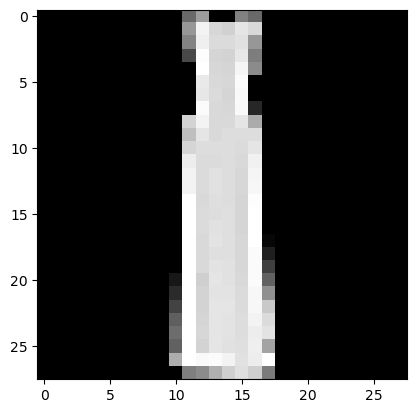

In [145]:
plt.imshow(np.array(d.permute(1,2,0)))

In [152]:
im = im.repeat(1,3,1,1)

In [153]:
im.shape[0:]

torch.Size([64, 3, 28, 28])

In [156]:
if im.shape[2:] == (28,28):
    print('yes')

yes
